# Урок 8

## Дисперсионный анализ. Факторный анализ. Логистическая регрессия

### Дисперсионный анализ

__Дисперсионный анализ__ — метод в математической статистике, направленный на поиск зависимостей в экспериментальных данных путём исследования значимости различий в средних значениях. В дисперсионном анализе изучается влияние одного или нескольких факторов на зависимую переменную, причём факторы являются _номинативными_ (_категориальными_), а целевая переменная является _абсолютной_ (_количественной_).

В __однофакторном дисперсионном анализе__ на одну переменную $Y$ влияет один фактор, наблюдаемый на $k$ _уровнях_, т.е. имеем $k$ выборок для переменной $Y$. Проверяется гипотеза $H_0$ о равенстве средних значений по каждой выборке:

$$H_0: \: \overline{y_1} = \dots = \overline{y_k}.$$

Наблюдаемые данные обозначим $y_{ij}$, где $i$ — индекс уровня ($i = 1, 2, \dots, k$), $j$ — индекс наблюдения на $i$-м уровне ($j = 1, 2, \dots, n_i$). Здесь $n_i$ - число наблюдений на $i$-м уровне. Таким образом, 

$$y_i = \{ y_{i1}, \dots, y_{i n_i} \}$$

для $i = 1, 2, \dots, k$. Соответственно, $\overline{y_i}$ - среднее значение на выборке $y_i$. Обозначим через $n$ общее число наблюдений:

$$n = \displaystyle\sum_{j=1}^{k} n_i.$$

Среднее от всей выборки:

$$\overline{y} = \dfrac{1}{n} \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} y_{ij}.$$

Сумма квадратов отклонений наблюдений от общего среднего:

$$S^2 = \displaystyle\sum_{i=1}^{k} \displaystyle\sum_{j=1}^{n_i} ({y}_{ij} - \overline{y})^2.$$

Эту сумму можно разбить на сумму квадратов отклонений средних групповых значений от общего среднего значения $\overline{y}$:

$$S_F^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i$$

и остаточную сумму квадратов отклонений:

$$S_{res}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2.$$

Для этих значений должно быть справедливо равенство

$$S^2 = S_F^2 + S_{res}^2.$$

По этим значениям можно вычислить соответствующие несмещённые оценки дисперсий:

$$\sigma^2 = \dfrac{S^2}{n - 1}, \: \sigma_F^2 = \dfrac{S_F^2}{k - 1}, \: \sigma_{res}^2 = \dfrac{S_{res}^2}{n - k}.$$

Для проверки гипотезы $H_0$ запишем статистику

$$T = \dfrac{\sigma_F^2}{\sigma_{res}^2}.$$

В предположении верности гипотезы $H_0$ статистика $T$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Для выбранного уровня значимости $\alpha$ можно рассчитать критическое значение $F_{crit}$, равное квантилю порядка $1 - \alpha$ для распределения $F(k_1, k_2)$. Если $T > F_{crit}$, то гипотеза $H_0$ отвергается.

__Пример 1__

Среди людей, проживающих в одном городе, выделены три группы по профессии: бухгалтеры, юристы, программисты. Имеются данные по зарплатам в этих трёх группах:
```
y1 = [70, 50, 65, 60, 75]
y2 = [80, 75, 90, 70, 75, 65, 85, 100]
y3 = [130, 100, 140, 150, 160, 170, 200]
```
Требуется проверить гипотезу у равенстве средней зарплаты по каждой группе. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [1]:
import numpy as np

In [2]:
y1 = np.array([70, 50, 65, 60, 75], dtype=np.float64)
y2 = np.array([80, 75, 90, 70, 75, 65, 85, 100], dtype=np.float64)
y3 = np.array([130, 100, 140, 150, 160, 170, 200], dtype=np.float64)

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

Выборочные средние по каждой группе:

In [3]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(64.0, 80.0, 150.0)

Видно, что средние зарплаты разнятся. Проверим статистическую значимость этого отличия. 

Соберём все значения заработных плат в один массив:

In [4]:
y = np.concatenate([y1, y2, y3])

print(y)

[ 70.  50.  65.  60.  75.  80.  75.  90.  70.  75.  65.  85. 100. 130.
 100. 140. 150. 160. 170. 200.]


In [5]:
y_mean = y.mean()
y_mean

100.5

Найдём значения $S_F$ и $S_{res}$:

In [7]:
S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

S2_F, S2_res

(27175.0, 7270.0)

Проверим выполнение равенства $S^2 = S_F^2 + S_{res}^2:$

In [8]:
S2_F + S2_res == ((y - y_mean) ** 2).sum()

True

Запишем оценки дисперсий:

In [9]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(13587.5, 427.6470588235294)

Итак, значение статистики $T$:

In [10]:
T = sigma2_F / sigma2_res
T

31.77269601100413

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [11]:
from scipy import stats

In [13]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.5915305684750827

Видим, что $T > F_{crit}$, поэтому заключаем, что отличие средних зарплат действительно является статистически значимым.

В __двухфакторном дисперсионном анализе__ на одну переменную $Y$ влияют два фактора $A$, $B$, каждый из которых является категориальным. Проверяются гипотезы о влиянии каждого фактора на значение $Y$. Отличие теперь в том, что влияния факторов на значение $Y$ могут "пересекаться", и это нужно учитывать.

Рассмотрим схему __двухфакторного дисперсионного анализа с однократными наблюдениями__. При таком подходе для каждой пары уровней факторов $A$ и $B$ выполняется только одно измерение переменной $Y$.

Пусть фактор $A$ имеет $m$ уровней, а фактор $B$ имеет $k$ уровней. Тогда исходные данные можно представить в виде таблицы

$$y = \left(
\begin{array}{ccc}
y_{11} & \dots & y_{1k} \\
y_{21} & \dots & y_{2k} \\
\vdots & \ddots & \vdots \\
y_{m1} & \dots & y_{mk}
\end{array}
\right),$$

где $y_{ij}$ - наблюдение на $i$-м уровне фактора $A$ и $j$-м уровне фактора $B$.

_Замечание_. В двухфакторном дисперсионном анализе с многократными наблюдениями каждый $y_{ij}$ представлял бы собой какой-то массив из значений.

По каждому фактору проверяется нулевая гипотеза о равенстве средних значений на каждом уровне. Пусть $y_{i \ast}$ обозначает $i$-ю строку, а $y_{\ast j}$ обозначает $j$-й столбец. В таких обозначениях $y_{i \ast}$ соответствует значениям переменной $Y$ на $i$-м уровне фактора $A$ и $k$ уровнях фактора $B$. Наоборот, $y_{\ast j}$ - значения переменной $Y$ на $m$ уровнях фактора $A$ и $j$-м уровне фактора $B$.

Нулевые гипотезы можно записать в следующем виде:

$$H_{0A}: \: \overline{y_{1 \ast}} = \dots = \overline{y_{m \ast}}, \:
H_{0B}: \: \overline{y_{\ast 1}} = \dots = \overline{y_{\ast k}}.$$

Далее аналогичным образом вычисляются оценки дисперсий. Сначала считаем суммы квадратов отклонений:

$$S_A^2 = k \cdot \displaystyle\sum_{i=1}^m \left( \overline{y_{i \ast}} - \overline{y} \right)^2, \:
S_B^2 = m \cdot \displaystyle\sum_{j=1}^k \left( \overline{y_{\ast j}} - \overline{y} \right)^2,$$
$$S_{res}^2 = \displaystyle\sum_{i=1}^m \displaystyle\sum_{j=1}^k \left( y_{ij} - \overline{y_{i \ast}} - \overline{y_{\ast j}} + \overline{y} \right)^2.$$

Оценки дисперсий:

$$\sigma_A^2 = \dfrac{S_A^2}{m - 1}, \: \sigma_B^2 = \dfrac{S_B^2}{k - 1}, \:
\sigma_{res}^2 = \dfrac{S_{res}^2}{(k - 1) (m - 1)}.$$

По этим оценкам дисперсий вычисляются статистики:

$$T_A = \dfrac{\sigma_A^2}{\sigma_{res}^2}, \: T_B = \dfrac{\sigma_B^2}{\sigma_{res}^2}.$$

Для выбранного уровня значимости $\alpha$ по каждому фактору вычисляется соответствующее критическое значение. Для фактора $A$ критическое значение $F_{crit, A}$ - квантиль порядка $1 - \alpha$ для распределения $F(k_{1A}, k_{2A})$, где $k_{1A} = m - 1$, $k_{2A} = n - m$. Здесь $n = k \cdot m$ - общее число наблюдений. Аналогично, $F_{crit, B}$ - квантиль порядка $1 - \alpha$ для распределения $F(k_{1B}, k_{2B})$, где $k_{1B} = k - 1$, $k_{2B} = n - k$.

Наконец, проверяются гипотезы. Если $T_A > F_{crit, A}$, то отвергается гипотеза $H_{0A}$, если $T_B > F_{crit, B}$, отвергается гипотеза $H_{0B}$.

### Факторный анализ

__Факторный анализ__ — это способ приведения множества непосредственно наблюдаемых факторов $x_j$, $j = 1, \dots, m$, к меньшему числу новых линейно независимых факторов $y_j$, $j = 1, \dots, q$, $q < m$.

Рассмотрим __метод главных компонент__. Этот метод заключается в вычислении собственных значений и собственных векторов для ковариационной матрицы:

$$\operatorname{cov} = \left(
\begin{array}{ccccc}
\sigma_1^2 & \sigma_{12} & \sigma_{13} & \dots & \sigma_{1m} \\
\sigma_{12} & \sigma_2^2 & \sigma_{23} & \dots & \sigma_{2m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sigma_{1m} & \sigma_{2m} & \sigma_{3m} & \dots & \sigma_m^2
\end{array}
\right)
$$

Посчитаем для этой матрицы собственные значения и расположим их в порядке убывания:

$$\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_m.$$

Метод главных компонент заключается в том, что если мы хотим получить $q$ признаков вместо $m$, наиболее выгодно взять $q$ наибольших собственных значений матрицы $\operatorname{cov}$, а затем с помощью соответствующих собственных векторов получить новые $q$ признаков.

Допустим, имеется матрица объект-признак:

$$X = \left(
\begin{array}{ccc}
x_{11} & \dots & x_{1m} \\
x_{21} & \dots & x_{2m} \\
\vdots & \ddots & \vdots \\
x_{n1} & \dots & x_{nm}
\end{array}
\right).
$$

В $j$-м столбце $i$-й строки этой матрицы содержится значение признака $x_j$ для $i$-го наблюдения. 

Перед тем, как применять метод главных компонент, данную матрицу нужно __центрировать__, т.е. из каждого столбца вычесть среднее значение соответствующего признака. В результате получим матрицу $X^\ast = \left( x_{ij}^\ast \right)_{n \times m}$, такую, что среднее значение по каждому столбцу матрицы $X^\ast$ равно 0.

Далее вычисляется матрица несмещённых выборочных ковариаций $\operatorname{cov} = \left( \sigma_{ij} \right)_{m \times m}$, где $\sigma_{ii} = \sigma_i^2$ - дисперсия $i$-го признака.

Пусть $v_1, \dots, v_m$ - собственные векторы (столбцы) матрицы $\operatorname{cov}$, соответствующие собственным значениям $\lambda_1, \dots, \lambda_m$. 

Возьмём первые $q$ векторов: $v_1, \dots, v_q$ и составим из этих столбцов матрицу $T$. Умножив матрицу $X^\ast$ на матрицу $T$, мы получим матрицу $Y = X^\ast \cdot T$ размера $n \times q$. Эта матрица состоит из значений новых признаков $y_i$.

Метод главных компонент можно также применять без конкретного значения $q$, а просто с целью получить меньшее число признаков, при этом потеряв минимальное количество информации. Количество потерянной информации можно оценить с помощью __доли объяснённой дисперсии__. Сумма дисперсий признаков (расположенных на главной диагонали) называется __общей дисперсией__:

$$\sigma^2 = \displaystyle\sum_{i=1}^m \sigma_i^2.$$

Соответственно, долей объяснённой дисперсии $i$-го признака называется частное $\dfrac{\sigma_i^2}{\sigma^2}$.

Идея состоит в том, чтобы взять первые $q$ признаков $y_1, \dots, y_q$ так, чтобы сумма их долей объяснённых дисперсий составляла не менее $90 \%$.

__Пример 2__

Рассмотрим матрицу объект признак:

In [14]:
samples = np.array([[5, 1.6],
                    [4, 1.4],
                    [6, 1.9],
                    [3, 1.1],
                    [4, 1.25]])

Поскольку признаков всего 2, соответствующие объекты можно расположить на плоскости:

In [15]:
from matplotlib import pyplot as plt

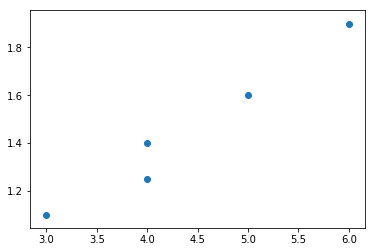

In [16]:
plt.scatter(samples[:, 0], samples[:, 1])

Как мы видим, объекты практически лежат на одной прямой. Это означает, что мы можем попытаться заменить два признака на один, при этом не потеряв слишком много информации. Для этого воспользуемся методом главных компонент. Сначала центрируем наши данные:

In [17]:
samples_centered = samples - samples.mean(axis=0)

print(samples_centered)

[[ 0.6   0.15]
 [-0.4  -0.05]
 [ 1.6   0.45]
 [-1.4  -0.35]
 [-0.4  -0.2 ]]


Теперь посчитаем матрицу ковариаций. Отметим, что если функция `numpy.cov` получает на вход двумерный массив, а не несколько одномерных массивов, то ожидается, что значения каждого признака будут расположены в строках (а не в столбцах, как у нас). Поэтому в эту функцию мы подаём транспонированную матрицу `samples_centered.T`.

In [18]:
cov = np.cov(samples_centered.T)

print(cov)

[[1.3    0.35  ]
 [0.35   0.0975]]


Собственные значения и собственные векторы можно теперь получить с помощью функции `numpy.linalg.eig`.

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

print('eigenvalues:\n{}\n'.format(eigenvalues))
print('eigenvectors:\n{}'.format(eigenvectors))

eigenvalues:
[1.39445221 0.00304779]

eigenvectors:
[[ 0.96546225 -0.26054298]
 [ 0.26054298  0.96546225]]


Отметим, что в массиве `eigenvectors` векторы записаны именно в столбцах.

Итак, мы хотим получить один признак, поэтому возьмём первый вектор (он соответствует первому собственному значению, которое сильно больше второго). Домножим матрицу `samples_centered` на этот вектор, чтобы получить новую матрицу объект-признак.

In [20]:
new_samples = samples_centered.dot(eigenvectors[:, [0]])

print(new_samples)

[[ 0.6183588 ]
 [-0.39921205]
 [ 1.66198394]
 [-1.44283719]
 [-0.4382935 ]]


Посчитаем долю объяснённой дисперсии этого нового признака. Общую дисперсию можно найти из матрицы ковариаций:

In [21]:
total_variance = cov[0, 0] + cov[1, 1]
total_variance

1.3975

Посчитаем несмещённую оценку дисперсии нового признака и найдём его долю от общей дисперсии:

In [22]:
variance = new_samples.var(ddof=1)

variance / total_variance

0.9978191114161408

Такое значение доли объяснённой дисперсии можно интерпретировать так: используя новые данные вместо старых, мы потеряем лишь $0.2 \%$ информации.

### Логистическая регрессия

Ранее мы познакомились с моделью линейной регрессии:

$$y = b_0 + b_1 x_1 + \dots + b_k x_k + \varepsilon.$$

Такая модель используется в задачах регрессии, т.е. когда нам нужно в результате получить какое-то число.

__Логистическая регрессия__ применяется в задачах _бинарной классификации_, когда нам нужно получить на выходе метку класса: $1$ или $-1$ (иногда вместо $-1$ используют $0$). Логистическая регрессия представляет собой модель линейной регрессии, _поверх_ которой используется __логистическая функция__ (или __сигмоида__):

$$\sigma(x) = \dfrac{1}{1 + e^{-x}}.$$

Сигмоида принимает в качестве аргумента вещественное число, а отдаёт число из промежутка $[0, 1]$.

Итак, модель логистической регрессии можно записать в виде:

$$y = \sigma(b_0 + b_1 x_1 + \dots + b_k x_k) = \sigma(x \cdot b),$$

где 
$b = \left(
\begin{array}{c}
b_0 \\
\vdots \\
b_k
\end{array}
\right)$ - столбец коэффициентов регрессии,
$x = \left( x_0, \dots, x_k \right)$ - строка факторов. (Напомним, что $x_0 = 1$ - "фиктивный" фактор.)

Такая модель на вход получает значения факторов, а на выходе отдаёт число из промежутка $[0, 1]$, которое можно интерпретировать как вероятность объекта принадлежать классу $1$.

В отличие от линейной регрессии, для модели логистической регрессии уже не выходит записать аналитическое решение. Поэтому для нахождения оптимального решения используют __градиентный спуск__. При этом минимизируют функционал:

$$Q(b) = \displaystyle\sum_{i=1}^m \ln \left( 1 + e^{- (x_i \cdot b) y_i} \right) \rightarrow \min_b.$$

Здесь $x_i$ - $i$-й объект из выборки, $y_i$ - его метка класса ($1$ или $-1$).

Зафиксируем следующие обозначения, чтобы не путаться:

$$X = \left(
\begin{array}{ccc}
x_{10} & \dots & x_{1k} \\
x_{20} & \dots & x_{2k} \\
\vdots & \ddots & \vdots \\
x_{m0} & \dots & x_{mk}
\end{array}
\right), \: 
y = \left(
\begin{array}{c}
y_1 \\
\vdots \\
y_m
\end{array}
\right).$$

Тогда функционал $Q$ можно переписать в виде:

$$Q(b) = \displaystyle\sum_{i=1}^m \ln \left( 1 + e^{- (b_0 x_{i0} + \dots + b_k x_{ik}) y_i} \right).$$

Чтобы использовать метод градиентного спуска, нам понадобится вектор градиента, который состоит из частных производных функционала $Q$ по переменным $b_j$:

$$\nabla Q = \left(
\begin{array}{c}
\dfrac{\partial Q}{\partial b_0} \\
\vdots \\
\dfrac{\partial Q}{\partial b_k}
\end{array}
\right),$$

где $\dfrac{\partial Q}{\partial b_j} = - \displaystyle\sum_{i=1}^m x_{ij} y_i \left( 1 - \sigma((b_0 x_{i0} + \dots + b_k x_{ik}) y_i) \right)$.

Непосредственно метод градиентного спуска заключается в следующем. Сначала выбираются начальные значения параметров $b_0, \dots, b_k$, т.е. вектор $b^{[0]}$. Затем итеративно повторяется вычисление:

$$b^{[n + 1]} = b^{[n]} - \lambda_n \nabla Q(b^{[n]}).$$

Параметр $\lambda_n$ отвечает за скорость спуска. Он может быть

* постоянным для всех $n$
* убывающим по мере возрастания $n$
* иным

Описанный выше процесс повторяется, пока соседние векторы $b^{[n + 1]}$, $b^{[n]}$ не перестанут сильно отличаться друг от друга.

Ниже приведена программная реализация градиентного спуска для функционала $Q$.

In [23]:
def sigmoid(x):
    """Сигмоида.
    """
    
    return 1 / (1 + np.exp(-x))

In [24]:
def partial_derivative(j, b, x, y):
    """Частная производная функционала Q по переменной b_j.
    """
    
    return -sum(
        x[i, j] * y[i] * (1 - sigmoid(b.dot(x[i]) * y[i]))
        for i in range(x.shape[0])
    )

In [25]:
def gradient(b, x, y):
    """Вектор градиента.
    """
    
    return np.array([
        partial_derivative(j, b, x, y)
        for j in range(b.shape[0])
    ])

In [26]:
def gradient_descent_step(lambda_, b, x, y):
    """Один шаг градиентного спуска.
    """
    
    return b - lambda_ * gradient(b, x, y)

__Пример 3__

Рассмотрим массив `samples` из примера 2.

[[5.   1.6 ]
 [4.   1.4 ]
 [6.   1.9 ]
 [3.   1.1 ]
 [4.   1.25]]


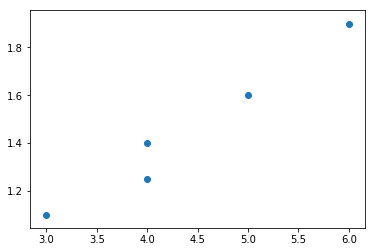

In [27]:
print(samples)

plt.scatter(samples[:, 0], samples[:, 1])

Пометим точки из правой верхней четверти меткой класса $1$, а остальные - меткой $-1$.

In [28]:
y = np.array([1, -1, 1, -1, -1])

Построим для данной задачи модель логистической регрессии методом градиентного спуска.

Добавим столбец "фиктивного" фактора:

In [29]:
ones = np.ones((samples.shape[0], 1))

x = np.hstack([ones, samples])

print(x)

[[1.   5.   1.6 ]
 [1.   4.   1.4 ]
 [1.   6.   1.9 ]
 [1.   3.   1.1 ]
 [1.   4.   1.25]]


Нам понадобится метрика чтобы вычислять расстояние между соседними векторами параметров. Будем использовать евклидово расстояние.

In [30]:
from scipy.spatial.distance import euclidean

Начальное приближение $b^{[0]}$ можно выбирать нулевым или произвольным. Будем также использовать коэффициент $\lambda_n = \dfrac{0.1}{n}$.

In [55]:
b_0 = np.zeros(x.shape[1])
# b_0 = np.random.uniform(-100, 100, size=x.shape[1])

b = b_0

for i in range(1, 10 ** 5):
    lambda_ = 0.1 / i
    
    b_new = gradient_descent_step(lambda_, b, x, y)
        
    if euclidean(b, b_new) < 0.0001:
        print(f'success on step {i}\n')
        
        break
    
    b = b_new

b = b_new.reshape(-1, 1)

print(b)

success on step 476

[[-0.31287309]
 [ 0.08090979]
 [-0.05599962]]


Для подобранных параметров получаем вектор из предсказанных значений $z = \sigma(X \cdot b)$.

In [56]:
z = x.dot(b)

z = np.array([sigmoid(z_i) for z_i in z])

print(z)

[[0.50051912]
 [0.48309809]
 [0.51654056]
 [0.46711173]
 [0.48519596]]


В данном векторе содержатся вероятности каждого объекта принадлежать классу $1$. Будем причислять объект к классу $1$ если даная вероятность больше 0.5.

In [57]:
y_pred = np.array([
    1 if z_ > 0.5 else -1
    for z_ in z
])

print(f'y_real: {y}')
print(f'y_pred: {y_pred}')

y_real: [ 1 -1  1 -1 -1]
y_pred: [ 1 -1  1 -1 -1]


Можно заметить, что при некоторых значениях начального приближения $b^{[0]}$ метод градиентного спуска расходится. Это связано с тем, что начальное приближение оказывается слишком далеко от оптимальных значений, а $\lambda_n$ быстро убывает с ростом $n$, поэтому шаги градиентного спуска становятся всё менее значительными.

In [ ]:
print(b_0)

### Упражнения

__Задача 1__

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: 
```
football_players = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_players = [177, 179, 180, 188, 177, 172, 171, 184, 180]
lifters = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]
```

__Задача 2__

Прикрепить ссылку на курсовой проект на github (см. выбор темы в ДЗ к Уроку 6).
